In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#Iris dataset from sklearn
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<h4>лаб05 -> Instance Selection</h4>
<h5>На примере работы с KNN</h5>

<img src="./img/knnExemple.png" height = 350>

In [11]:
# Loading Iris data to DataFrame
iris = load_iris()

# Создание DataFrame для удобства работы
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Вывод первых нескольких строк датасета
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


<h4>Let's balance data and predict base on KNN</h4>

In [12]:
X, y = iris.data, iris.target
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Создание DataFrame из сбалансированных данных
iris_resampled_df = pd.DataFrame(data=X_resampled, columns=iris.feature_names)
iris_resampled_df['target'] = y_resampled

# Проверка распределения классов после балансировки
print(iris_resampled_df['target'].value_counts())

target
0    50
1    50
2    50
Name: count, dtype: int64


<h4>1/2) Построение KNN и анализ ошибок модели</h4>

Accuracy: 1.00


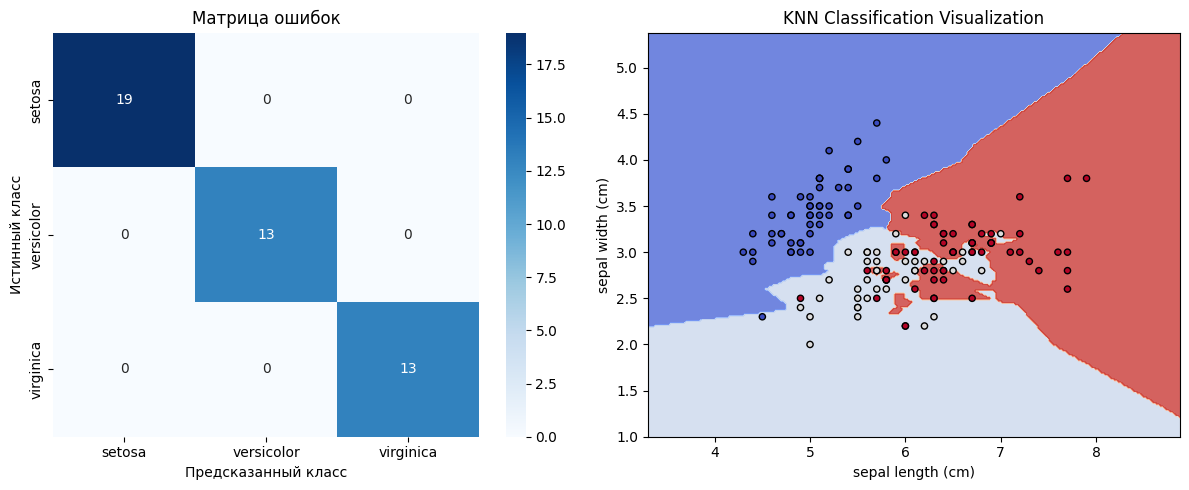

In [13]:
iris = load_iris()
X, y = iris.data, iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Прогнозирование
y_pred = knn.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация результатов
plt.figure(figsize=(12, 5))

# Построение матрицы ошибок
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

# Используем только два признака для визуализации
X_vis = iris.data[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Нормализация данных для визуализации
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

# Обучение модели KNN на двух признаках
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Построение результатов классификации
plt.subplot(1, 2, 2)
h = .02  # шаг сетки
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание классов для сетки
Z_vis = knn_vis.predict(scaler_vis.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_vis = Z_vis.reshape(xx.shape)

plt.contourf(xx, yy, Z_vis, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
plt.title('KNN Classification Visualization')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

<h4>3) Работа с опорными векторами</h4>

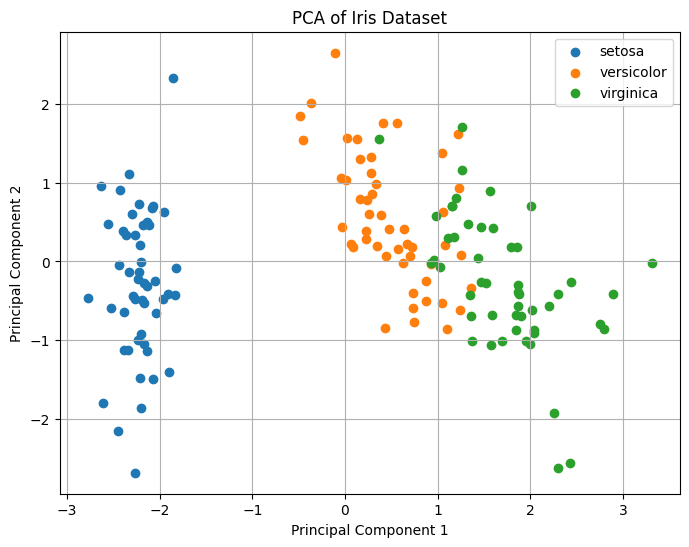

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

# Проецирование данных на первые две главные компоненты
X_pca = U[:, :2] * S[:2]

# Построение ординационной диаграммы
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()